In [3]:
%load_ext autoreload
%autoreload 2
import sys
#sys.path.append('/usr/lib/python3.4/site-packages')
import matplotlib
%matplotlib inline
#matplotlib.use('TkAgg')
import BPV
import pattern_manipulation as pm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
df = BPV.Data()
df.read_csv("p.delviva.csv",False)
df.df.sort_index(by="p",inplace=True,ascending=True)
df.df.set_index(pd.Index([j for j in range(len(df.df))]), inplace=True)
df_head = df.data_head(100)

In [5]:
df = df_head
N=15
#Wvalues = [0.005,0.01,0.05,0.1,0.125,0.15,0.175,0.2,0.25,0.3,0.35]
#Wvalues = [0.015, 0.025, 0.03, 0.035,0.04]
#Wvalues = [0.005]
minW = 0.005
maxW = 0.04
Wsteps = 10
Wvalues = np.arange(minW,maxW,(maxW-minW)/Wsteps)
    
prbl_decgH1 = {}
prbl_decgW1 = {}
Hnnodes1 = []
Wnnodes1 = []
for W in Wvalues:
    print("Solution for W={0}".format(W))
    prbl_pulp = BPV.BPV("pulp",df,N,W,time_solver=False)
    prbl_pulp.solve()
    prbl_pulp.pprint_solution()

    prbl_decgH1[W] = BPV.BPV("decgraphH",df,N,W,time_solver=False)
    prbl_decgH1[W].solve()
    prbl_decgH1[W].pprint_solution()
    Hnnodes1.append(prbl_decgH1[W].nnodes)
   
    prbl_decgW1[W] = BPV.BPV("decgraphW",df,N,W,time_solver=False)
    prbl_decgW1[W].solve()
    prbl_decgW1[W].pprint_solution()
    Wnnodes1.append(prbl_decgW1[W].nnodes)

    print("-----------------------------------")


Solution for W=0.005

Solver =  pulp 
Entropy =  0.025782167034014872 
Cardinality =  1 
Rate =  0.00483558994197

Solver =  decgraphH 
Entropy =  0.025782167034 
Cardinality =  1 
Rate =  0.00483558994197

Solver =  decgraphW 
Entropy =  0.025782167034 
Cardinality =  1 
Rate =  0.00483558994197
-----------------------------------


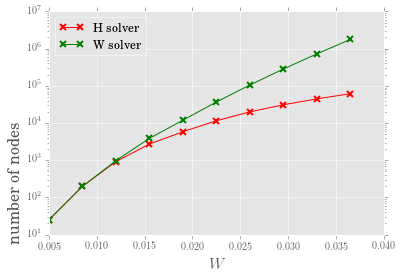

In [7]:
matplotlib.style.use('ggplot')
#plt.rcdefaults()

label_size = 16
ms = 2
_dpi = 250
#plt.ylim((-100,int(10e5)))
ax = plt.gca()
ax.set_yscale('log')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(Wvalues,Hnnodes1,'rx-',label='H solver',markeredgewidth=ms)
plt.plot(Wvalues,Wnnodes1,'gx-',label='W solver',markeredgewidth=ms)
plt.legend(loc=2)
plt.xlabel(r'$W$',fontsize=label_size)
plt.ylabel(r'number of nodes',rotation='vertical', fontsize=label_size, horizontalalignment='right')
#plt.savefig("/home/renato/tesi/testogit/img/nnodesW.png",dpi=_dpi,bbox_inches='tight')
plt.show()

In [9]:
df = df_head
W = 0.1
minN = 1
maxN = 3
#Nsteps = 10
#step = int((maxN-minN)/Nsteps)
step = 1
Nvalues = np.arange(minN,maxN,step)
    
prbl_decgH2 = {}
prbl_decgW2 = {}
Hnnodes2 = []
Wnnodes2 = []
for N in Nvalues:
    print("Solution for N={0}".format(N))
    prbl_pulp = BPV.BPV("pulp",df,N,W,time_solver=False)
    prbl_pulp.solve()
    prbl_pulp.pprint_solution()

    prbl_decgH2[N] = BPV.BPV("decgraphH",df,N,W,time_solver=False)
    prbl_decgH2[N].solve()
    prbl_decgH2[N].pprint_solution()
    Hnnodes2.append(prbl_decgH2[N].nnodes)
   
    prbl_decgW2[N] = BPV.BPV("decgraphW",df,N,W,time_solver=False)
    prbl_decgW2[N].solve()
    prbl_decgW2[N].pprint_solution()
    Wnnodes2.append(prbl_decgW2[N].nnodes)

    print("-----------------------------------")


Solution for N=1

Solver =  pulp 
Entropy =  0.06953064242416866 
Cardinality =  1 
Rate =  0.0170857511283

Solver =  decgraphH 
Entropy =  0.0695306424242 
Cardinality =  1 
Rate =  0.0170857511283

Solver =  decgraphW 
Entropy =  0.0695306424242 
Cardinality =  1 
Rate =  0.0170857511283
-----------------------------------
Solution for N=2

Solver =  pulp 
Entropy =  0.13906128484833732 
Cardinality =  2 
Rate =  0.0341715022566

Solver =  decgraphH 
Entropy =  0.139061284848 
Cardinality =  2 
Rate =  0.0341715022566

Solver =  decgraphW 
Entropy =  0.139061284848 
Cardinality =  2 
Rate =  0.0341715022566
-----------------------------------


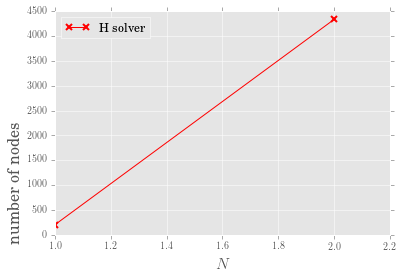

In [11]:
matplotlib.style.use('ggplot')
#plt.rcdefaults()

label_size = 16
ms = 2
_dpi = 250
#plt.ylim((-100,int(10e5)))
ax = plt.gca()
ax.set_yscale('linear')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(Nvalues[:6],Hnnodes2,'rx-',label='H solver',markeredgewidth=ms)
#plt.plot(Nvalues[:5],Wnnodes2,'gx-',label='W solver',markeredgewidth=ms)
plt.legend(loc=2)
plt.xlabel(r'$N$',fontsize=label_size)
plt.ylabel(r'number of nodes',rotation='vertical', fontsize=label_size, horizontalalignment='right')
#plt.savefig("/home/renato/tesi/testogit/img/nnodesN.png",dpi=_dpi,bbox_inches='tight')
plt.show()

In [2]:
df = BPV.Data()
df.read_csv("p.delviva.csv",False)
df.df.sort_index(by="p",inplace=True,ascending=True)
df.df.set_index(pd.Index([j for j in range(len(df.df))]), inplace=True)

minn = 30
maxn = 60
step = 10
nvalues = np.arange(minn,maxn,step)

W = 0.1
N = 10

prbl_decgH3 = {}
prbl_decgW3 = {}
Hnnodes3 = []
Wnnodes3 = []
for n in nvalues:
    df_head = df.data_head(n)
    print("Solution for n={0}".format(n))
    prbl_pulp = BPV.BPV("pulp",df_head,N,W,time_solver=False)
    prbl_pulp.solve()
    prbl_pulp.pprint_solution()

    prbl_decgH3[N] = BPV.BPV("decgraphH",df_head,N,W,time_solver=False)
    prbl_decgH3[N].solve()
    prbl_decgH3[N].pprint_solution()
    Hnnodes3.append(prbl_decgH3[N].nnodes)
   
    prbl_decgW3[N] = BPV.BPV("decgraphW",df_head,N,W,time_solver=False)
    prbl_decgW3[N].solve()
    prbl_decgW3[N].pprint_solution()
    Wnnodes3.append(prbl_decgW3[N].nnodes)

    print("-----------------------------------")


Solution for n=30

Solver =  pulp 
Entropy =  0.3653890220257811 
Cardinality =  4 
Rate =  0.0987654320988

Solver =  decgraphH 
Entropy =  0.365389022026 
Cardinality =  4 
Rate =  0.0987654320988

Solver =  decgraphW 
Entropy =  0.365389022026 
Cardinality =  4 
Rate =  0.0987654320988
-----------------------------------
Solution for n=40

Solver =  pulp 
Entropy =  0.40514105830010316 
Cardinality =  6 
Rate =  0.0988857938719

Solver =  decgraphH 
Entropy =  0.4051410583 
Cardinality =  6 
Rate =  0.0988857938719

Solver =  decgraphW 
Entropy =  0.4051410583 
Cardinality =  6 
Rate =  0.0988857938719
-----------------------------------
Solution for n=50

Solver =  pulp 
Entropy =  0.4345354911306133 
Cardinality =  8 
Rate =  0.0991983967936

Solver =  decgraphH 
Entropy =  0.434535491131 
Cardinality =  8 
Rate =  0.0991983967936

Solver =  decgraphW 
Entropy =  0.434535491131 
Cardinality =  8 
Rate =  0.0991983967936
-----------------------------------


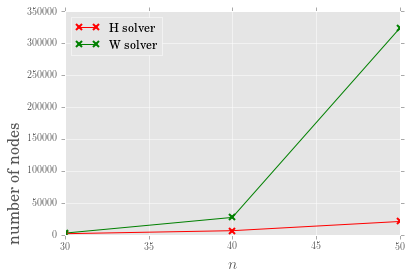

In [4]:
matplotlib.style.use('ggplot')
#plt.rcdefaults()

label_size = 16
ms = 2
_dpi = 250
#plt.ylim((-100,int(10e5)))
ax = plt.gca()
ax.set_yscale('linear')
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.plot(nvalues,Hnnodes3,'rx-',label='H solver',markeredgewidth=ms)
plt.plot(nvalues,Wnnodes3,'gx-',label='W solver',markeredgewidth=ms)
plt.legend(loc=2)
plt.xlabel(r'$n$',fontsize=label_size)
plt.ylabel(r'number of nodes',rotation='vertical', fontsize=label_size, horizontalalignment='right')
#plt.savefig("/home/renato/tesi/testogit/img/nnodesN.png",dpi=_dpi,bbox_inches='tight')
plt.show()